In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv("Dry_Bean.csv")
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [4]:
# Dropping the 'Class' column to keep only numerical features
X = data.drop(columns=['Class'])
X.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166


In [5]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Perform K-means clustering with 7 clusters
kmeans = KMeans(n_clusters=7, n_init=10, random_state=42)
kmeans.fit(X_scaled)


KMeans(n_clusters=7, n_init=10, random_state=42)

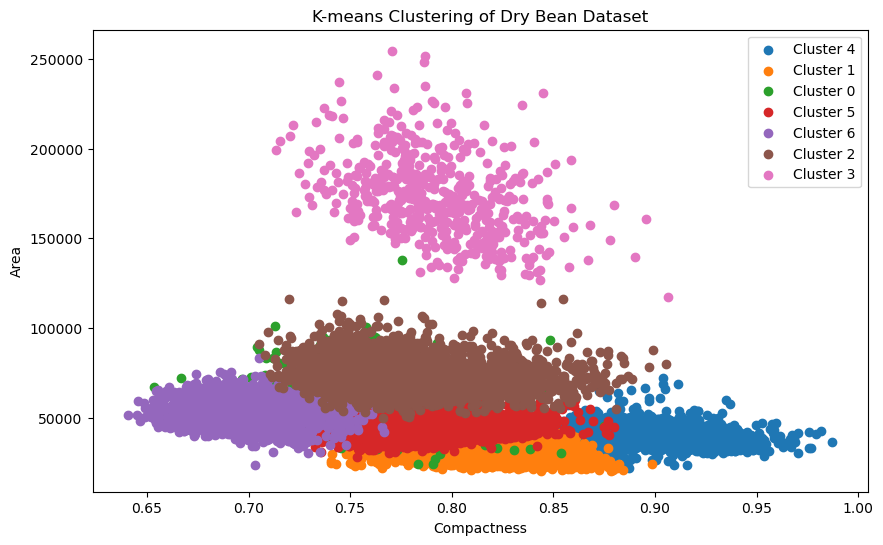

In [6]:
# Add cluster labels to the dataset
data['Cluster'] = kmeans.labels_
# Visualizing the clusters
plt.figure(figsize=(10, 6))
for cluster in data['Cluster'].unique():
    plt.scatter(data[data['Cluster'] == cluster]['Compactness'],
                data[data['Cluster'] == cluster]['Area'],
                label=f'Cluster {cluster}')
plt.xlabel('Compactness')
plt.ylabel('Area')
plt.title('K-means Clustering of Dry Bean Dataset')
plt.legend()
plt.show()


In [7]:
#Perform K-Means with PCA on Dry Beans Dataset
#Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
# Perform K-means clustering with 7 clusters
kmeans.fit(X_pca)

KMeans(n_clusters=7, n_init=10, random_state=42)

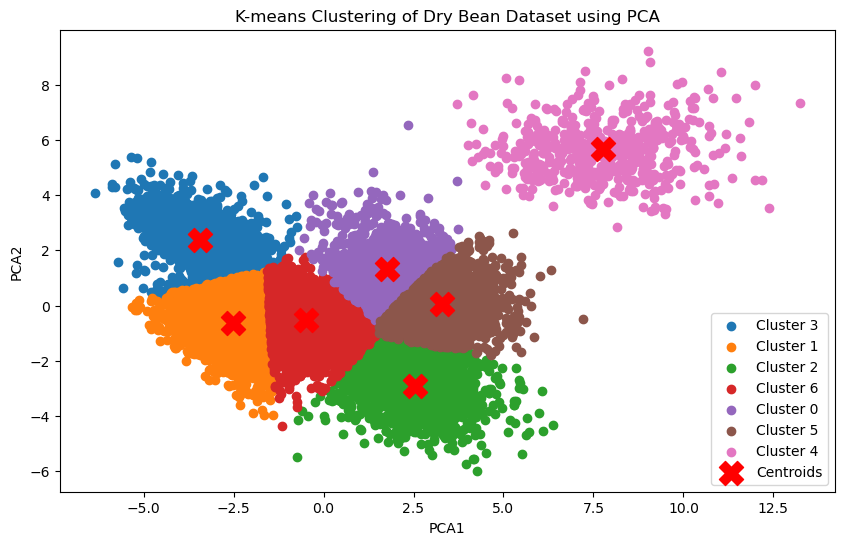

In [8]:
# Add cluster labels to the dataset
data['Cluster'] = kmeans.labels_
# Plotting the clusters and centroids
plt.figure(figsize=(10, 6))
for cluster in data['Cluster'].unique():
    plt.scatter(X_pca[data['Cluster'] == cluster, 0],
                X_pca[data['Cluster'] == cluster, 1],
                label=f'Cluster {cluster}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('K-means Clustering of Dry Bean Dataset using PCA')
plt.legend()
plt.show()